In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab Notebooks/Sprint/Term 2

/content/drive/MyDrive/Colab Notebooks/Sprint/Term 2


In [ ]:
data = pd.read_csv("sl_covid_dataset.csv")

FileNotFoundError: ignored

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(36)
memory usage: 4.8+ MB


In [ ]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

Checks for missing values

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

Here dropping columns with 90% and above of missing values

In [ ]:
unuseful_data = data[data.columns[data.isna().sum()/data.shape[0] > 0.9]]
data.drop(columns=unuseful_data.columns, inplace=True)

Now lets check for what we are left with

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Coronaviru

### Analyse the age quantile

In [ ]:
fig1= ff.create_distplot([data['Patient age quantile']], ['Patient age quantile'])
fig1.show()

In [ ]:
data['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

It appears like the ages are not the real values, hence they have been quantized 

### Understanding the target variable

In [ ]:
fig= plt.figure(figsize=(25,10))
fig= px.pie(data, names= 'SARS-Cov-2 exam result', color_discrete_sequence= px.colors.sequential.RdBu, hole= 0.4)
fig.update_traces(textposition = 'inside')
fig.show()

NameError: ignored

### Understanding other categorical values

In [ ]:
for col in data.select_dtypes('object'):
    fig= plt.figure(figsize=(45,30))
    if col != 'SARS-Cov-2 exam result':
      fig= px.pie(data, names= col, color_discrete_sequence= px.colors.sequential.RdBu, hole= 0.4, title=col)
      fig.update_traces(textposition = 'inside')
      fig.show()

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

<Figure size 3240x2160 with 0 Axes>

It seems like not-detected and negative takes the bigger percentage

### Check the relationship between the target and other variables

Creating subsets according to the target column value(positive, negative)

In [ ]:
positive_data = data[data['SARS-Cov-2 exam result'] == 'positive']
negative_data = data[data['SARS-Cov-2 exam result'] == 'negative']

Creating subsets according to the analysis done when checking the missing values

In [ ]:
# using the missing rate as the differentiator 
missing_rate = data.isna().sum()/data.shape[0]

blood_columns = data.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
virus_columns = data.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

Visualization of the distribution between the blood columns and the target column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

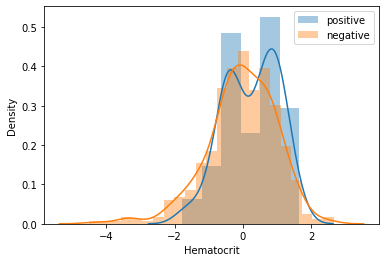

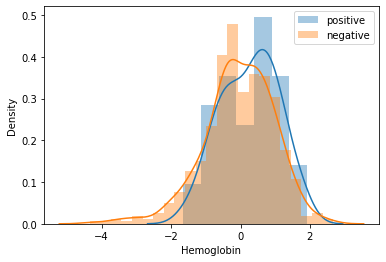

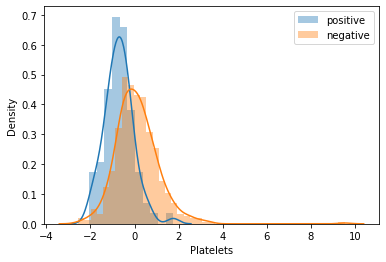

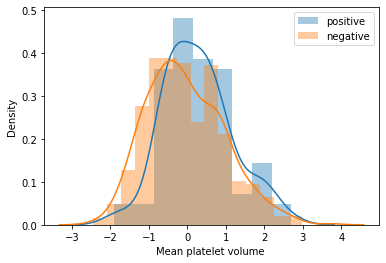

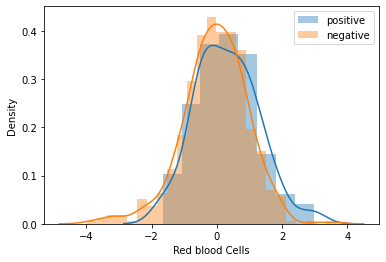

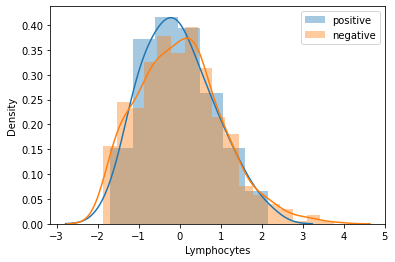

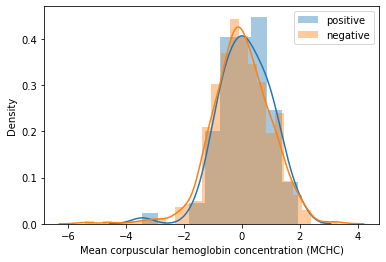

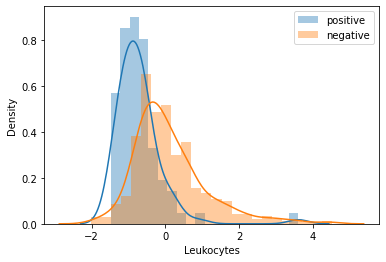

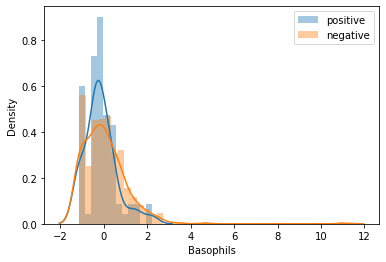

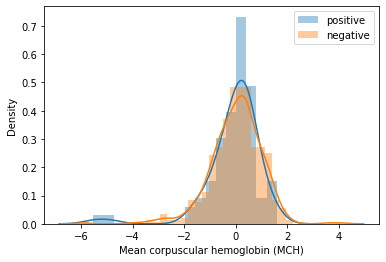

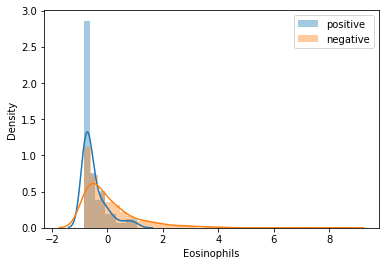

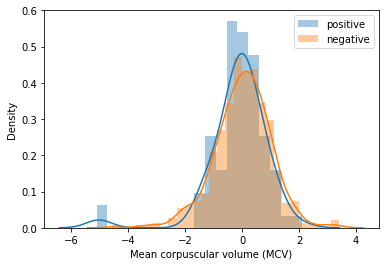

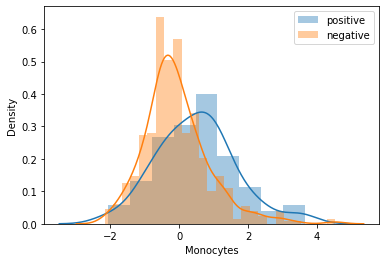

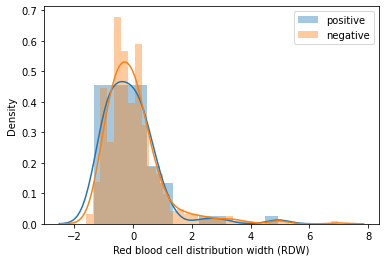

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_data[col], label='positive')
    sns.distplot(negative_data[col], label='negative')
    plt.legend()

We can see that things like 
- Platelets
- Monocytes
- Leukocytes

Might contain useful information for covid-19 diagnosis

Visualization of the distribution between the columns that contians viruses data and the target column

In [ ]:
for col in virus_columns:
    print(pd.crosstab(data['SARS-Cov-2 exam result'], data[col]))
    print('------')

Respiratory Syncytial Virus  detected  not_detected
SARS-Cov-2 exam result                             
negative                           52          1190
positive                            0           112
------
Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112
------
Influenza B             detected  not_detected
SARS-Cov-2 exam result                        
negative                      74          1168
positive                       3           109
------
Parainfluenza 1         detected  not_detected
SARS-Cov-2 exam result                        
negative                       3          1237
positive                       0           112
------
CoronavirusNL63         detected  not_detected
SARS-Cov-2 exam result                        
negative                      42          1198
positive                       3           109
------
Rhino

Viruse like rhino virus shows some signs of being related to covid-19 but after some research we found that it is very common in the area where the data was collected and it is not due to covid-19, so it's not included and things like influenza B and A are just tests not viruses

### Preprocessing

In [ ]:
def preprocessor(data):

  # data encoding
  code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
  for col in data.select_dtypes('object').columns:
      data.loc[:,col] = data[col].map(code)

  # data cleaning
  data = data.dropna(axis=0)

  return data

In [ ]:
data = preprocessor(data)
data.isna().sum()

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Mean corpuscular volume (MCV)                           

In [ ]:
X = data.drop('SARS-Cov-2 exam result', axis=1)
y = data['SARS-Cov-2 exam result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

### Modelling

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import tensorflow as tf

model = Sequential()
model.add(Dense(50, activation=tf.nn.relu))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=["accuracy"])
model.fit(X_train, y_train, shuffle=True, batch_size=30, epochs=15, verbose=1)
score = model.evaluate(X_train, y_train, verbose=0)
print('loss:', score[0])
print('accuracy:', score[1])

Epoch 1/15
3/3 [==============================] - 1s 5ms/step - loss: 0.6207 - accuracy: 0.6544
Epoch 2/15
3/3 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.8845
Epoch 3/15
3/3 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.8679
Epoch 4/15
3/3 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8887
Epoch 5/15
3/3 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8720
Epoch 6/15
3/3 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8387
Epoch 7/15
3/3 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8554
Epoch 8/15
3/3 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8387
Epoch 9/15
3/3 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.8595
Epoch 10/15
3/3 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.8262
Epoch 11/15
3/3 [======================

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)
print(accuracy_score(y_test, y_pred))

0.9


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2))

0.9


Lets check the f1 score

In [ ]:
print('for ANN:',f1_score(y_test, y_pred, average='macro'))
print('for Gradient Boosting:',f1_score(y_test, y_pred2, average='macro'))

for ANN: 0.4736842105263158
for Gradient Boosting: 0.4736842105263158


In [ ]:
y.value_counts()

0    86
1    13
Name: SARS-Cov-2 exam result, dtype: int64

Fhe f1 score is very bad due to inbalanced data, lets fix it

We are going to perform over sampling in order to fill the minority value with values and make sure that our data are balanced

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_sampler = SMOTE()
X, y = over_sampler.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [ ]:
# ANN
model.fit(X_train, y_train, shuffle=True, batch_size=30, epochs=15, verbose=1)
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Epoch 1/15
5/5 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 1.0000
Epoch 2/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 11/15
5/5 [======================

In [ ]:
# Gradient Boosting
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print('for ANN:',f1_score(y_test, y_pred, average='macro'))
print('for Gradient Boosting:',f1_score(y_test, y_pred2, average='macro'))

for ANN: 0.9714285714285714
for Gradient Boosting: 0.9428104575163399


The ANN performed better, and it would the model to use on future data